In [1]:
# import pandas
import pandas as pd

# read the data into your workspace
ba_data = pd.read_csv('datasets/breath_alcohol_ames.csv')

# quickly inspect the data
print(ba_data.head())

# obtain counts for each year 
ba_year = ba_data['year'].value_counts()
ba_year

   year  month  day  hour location gender   Res1   Res2
0  2017     12   17     1  Ames PD      M  0.046  0.046
1  2017     12   14     3   ISU PD      F  0.121  0.120
2  2017     12   10     5   ISU PD      F  0.068  0.067
3  2017     12   10     3   ISU PD      F  0.077  0.077
4  2017     12    9     2   ISU PD      M  0.085  0.084


2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

In [2]:
# use value_counts to tally up the totals for each department
pds = ba_data['location'].value_counts()
pds

ISU PD     940
Ames PD    616
Name: location, dtype: int64

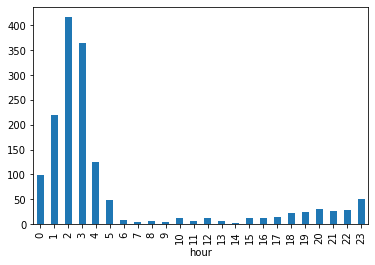

In [3]:
%matplotlib inline

# count by hour 
hourly = ba_data.groupby(['hour']).size()

# create a vertical bar graph of the arrest count by hour
hourly.plot.bar(x='hour')

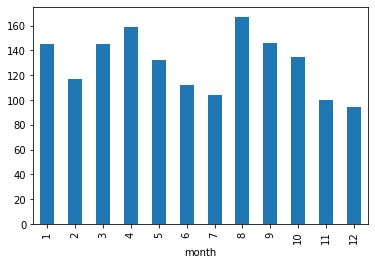

In [4]:
# count by month and arrange by descending frequency
monthly = ba_data.groupby(['month']).size()

# use plot.bar to make the appropriate bar chart
monthly.plot.bar(x='month')

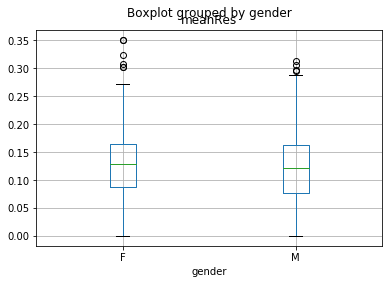

In [5]:
# count by gender
counts_gender = ba_data['gender'].value_counts()

# create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'])

# create a mean test result variable
mean_bas = gen.assign(meanRes=(gen['Res1']+gen['Res2'])/2)

# # create side-by-side boxplots to compare the mean blood alcohol levels of men and women
mean_bas.boxplot(['meanRes'], by = 'gender')

In [6]:
# Filter the data
duis = ba_data[(ba_data.Res1 > 0.08 ) | (ba_data.Res2 > 0.08)]


# proportion of tests that would have resulted in a DUI
p_dui = duis.shape[0] / ba_data.shape[0]
p_dui

0.7448586118251928